#Marketing Email Analysis and Prediction Project Description:

A marketing company wants to make an internal spam email detection so that before sending any email they can findout if the email will be considered as spam or not.

They need to find the words which are the cause for detecting an email as spam. And which words can be useful to be identified as ham (not spam) emails only.

Problem Statement:

Detect Spam Emails (create a text classification model that detects spam email) include the inference function and test it out.

Make a worcloud for spam emails and ham emails (safe) and see if any words stand out in either category

Give the stakeholders a list of terms that they can avoid adding to their emails to prevent their marketing emails going into the spam box of their customers

#Key Objectives:

1. Building a text classification model to classify emails as spam or ham (not spam).
2. Providing stakeholders with insights about specific words that increase the likelihood of being flagged as spam (and those that are safe to use).

#Analysis of Procedure to be taken for the Analysis

1. Loading and Exploring the dataset
2. Preprocessing the data
3. Visualizing the word pattern
4. Feature Extraction (Converting text to numbers using Bag of words i.e Frequency of occurence of each word)
5. Training a classification model
6. Identifying key words that help model classify a mail as a spam or ham
7. Building an inference function (a reusable function)


#1. Loading and Exploring the dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset
df = pd.read_csv('emails.csv')

In [ ]:
# Checking the first few rows
print(df.head())

                                                text spam Unnamed: 2  \
0  Subject: naturally irresistible your corporate...    1        NaN   
1  Subject: the stock trading gunslinger  fanny i...    1        NaN   
2  Subject: unbelievable new homes made easy  im ...    1        NaN   
3  Subject: 4 color printing special  request add...    1        NaN   
4  Subject: do not have money , get software cds ...    1        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  ... Unnamed: 100 Unnamed: 101 Unnamed: 102 Unnamed: 103  \
0        NaN  ...          NaN          NaN          NaN          N

In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 text               0
spam               2
Unnamed: 2      5728
Unnamed: 3      5728
Unnamed: 4      5728
                ... 
Unnamed: 105    5728
Unnamed: 106    5728
Unnamed: 107    5729
Unnamed: 108    5729
Unnamed: 109    5729
Length: 110, dtype: int64


In [ ]:
df.columns

Index(['text', 'spam', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 100', 'Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103',
       'Unnamed: 104', 'Unnamed: 105', 'Unnamed: 106', 'Unnamed: 107',
       'Unnamed: 108', 'Unnamed: 109'],
      dtype='object', length=110)

In [ ]:
df=df[['text', 'spam']]
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5725,Subject: re : research and development charges...,0
5726,"Subject: re : receipts from visit jim , than...",0
5727,Subject: re : enron case study update wow ! a...,0
5728,"Subject: re : interest david , please , call...",0


In [ ]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5730 non-null   object
 1   spam    5728 non-null   object
dtypes: object(2)
memory usage: 89.7+ KB
(5730, 2)


In [ ]:
#remove duplicates if any
df.drop_duplicates()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5730 non-null   object
 1   spam    5728 non-null   object
dtypes: object(2)
memory usage: 89.7+ KB


(5730, 2)

In [ ]:
df.spam.value_counts()

,count
spam,
0,4358
1,1368
its termination would not have such a phenomenal impact on the power situation . however,1
mr suresh prabhu,1


In [ ]:
df2 = df[~df['spam'].isin(['0', '1'])]
df2

,text,spam
1380,Subject: from the enron india newsdesk - april...,NaN
1381,e dpc contributed only 0 . 7 per cent of the ...,its termination would not have such a phenom...
2651,Subject: from the enron india newsdesk - april...,NaN
2652,lf against undeserved claims in the event of e...,mr suresh prabhu


In [ ]:
# Drop those rows from df
df = df.drop(df2.index)

# Display the updated df
print(df)

                                                   text spam
0     Subject: naturally irresistible your corporate...    1
1     Subject: the stock trading gunslinger  fanny i...    1
2     Subject: unbelievable new homes made easy  im ...    1
3     Subject: 4 color printing special  request add...    1
4     Subject: do not have money , get software cds ...    1
...                                                 ...  ...
5725  Subject: re : research and development charges...    0
5726  Subject: re : receipts from visit  jim ,  than...    0
5727  Subject: re : enron case study update  wow ! a...    0
5728  Subject: re : interest  david ,  please , call...    0
5729  Subject: news : aurora 5 . 2 update  aurora ve...    0

[5726 rows x 2 columns]


In [ ]:
df.count()

,0
text,5726
spam,5726


In [ ]:
print(df['spam'].unique())

['1' '0']


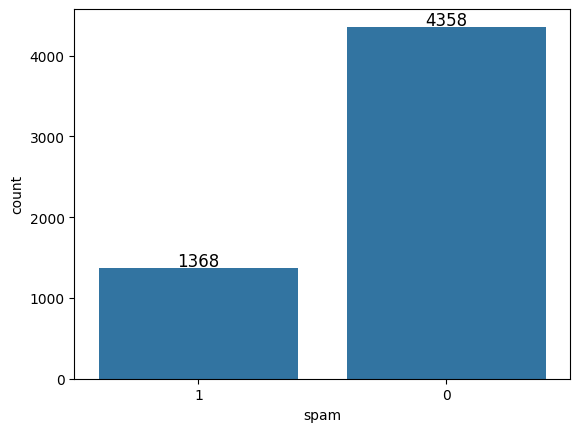

In [ ]:
#Create the countplot
ax = sns.countplot(x='spam', data=df)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert the height to an integer
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

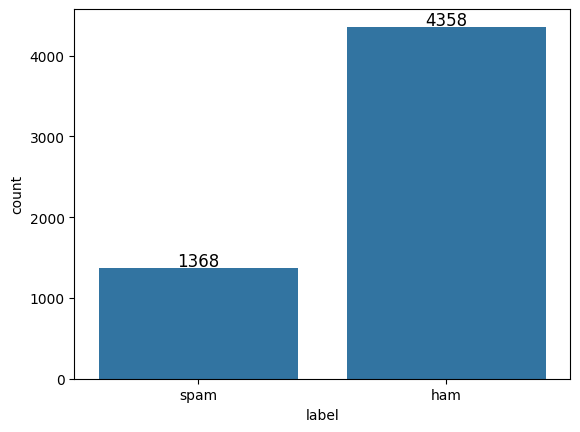

In [ ]:
# Convert 'spam' column to numeric (if it's a string)
df['spam'] = pd.to_numeric(df['spam'], errors='coerce')  # 'coerce' will turn invalid values into NaN

# Map 0 to 'ham' and 1 to 'spam'
df['label'] = df['spam'].map({0: 'ham', 1: 'spam'})

# Create the countplot with the new 'spam_label' column
ax = sns.countplot(x='label', data=df)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
# Check class distribution
print("Class Distribution:\n", df['text'].value_counts())

Class Distribution:
 text
Subject: vp & director count for the research group  hello deborah :  i would like to introduce myself and anita dupont to you as we will probably  be working together quite a bit between now and our move . please feel  free to contact either one of us regarding any questions or needs you  may have .  headcount  the executive , vp and director headcount for the research group is :  managing director 1  vice presidents 6  directors 5  also , anita and i would like to invite you to meet with us and go over our  library space requirements . please let me know when you have some  free time and we will be available .  my number is : 3 - 5290 - ebl 961  anita ' s # is : 3 - 0329 - ebl 969  i look forward to meeting you ,  shirley crenshaw  administrative coordinator  enron research group  3 - 5290                                                                                                                                                                            

In [ ]:
#remove Subject:
df['text']=df['text'].str.replace('Subject:','')
df

,text,spam,label
0,naturally irresistible your corporate identit...,1,spam
1,the stock trading gunslinger fanny is merril...,1,spam
2,unbelievable new homes made easy im wanting ...,1,spam
3,4 color printing special request additional ...,1,spam
4,"do not have money , get software cds from her...",1,spam
...,...,...,...
5725,re : research and development charges to gpg ...,0,ham
5726,"re : receipts from visit jim , thanks again...",0,ham
5727,re : enron case study update wow ! all on th...,0,ham
5728,"re : interest david , please , call shirley...",0,ham


In [ ]:
# Reheck class distribution
print("Class Distribution:\n", df['text'].value_counts())

Class Distribution:
 text
vp & director count for the research group  hello deborah :  i would like to introduce myself and anita dupont to you as we will probably  be working together quite a bit between now and our move . please feel  free to contact either one of us regarding any questions or needs you  may have .  headcount  the executive , vp and director headcount for the research group is :  managing director 1  vice presidents 6  directors 5  also , anita and i would like to invite you to meet with us and go over our  library space requirements . please let me know when you have some  free time and we will be available .  my number is : 3 - 5290 - ebl 961  anita ' s # is : 3 - 0329 - ebl 969  i look forward to meeting you ,  shirley crenshaw  administrative coordinator  enron research group  3 - 5290                                                                                                                                                                                     

In [ ]:
#Rehecking df for null values
print(df.isna().sum())

text     0
spam     0
label    0
dtype: int64


#2. Preprocessing the Dataset

##Importing the Required Library

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
df3 =df.copy()

In [ ]:
df4 = df3[['text','spam', 'label']]
df4.head()

,text,spam,label
0,naturally irresistible your corporate identit...,1,spam
1,the stock trading gunslinger fanny is merril...,1,spam
2,unbelievable new homes made easy im wanting ...,1,spam
3,4 color printing special request additional ...,1,spam
4,"do not have money , get software cds from her...",1,spam


In [ ]:
df4.count()

,0
text,5726
spam,5726
label,5726


In [ ]:
df4 = df4.dropna()
df4.count()

,0
text,5726
spam,5726
label,5726


# Using notnull() to identify columns in DataFrame with no Null Values

In [ ]:
df4.count()

,0
text,5726
spam,5726
label,5726


In [ ]:
df_notnull_mask = df4.notnull().all(axis=1)
df_notnull_rows = df4[df_notnull_mask]

df_notnull_rows

,text,spam,label
0,naturally irresistible your corporate identit...,1,spam
1,the stock trading gunslinger fanny is merril...,1,spam
2,unbelievable new homes made easy im wanting ...,1,spam
3,4 color printing special request additional ...,1,spam
4,"do not have money , get software cds from her...",1,spam
...,...,...,...
5725,re : research and development charges to gpg ...,0,ham
5726,"re : receipts from visit jim , thanks again...",0,ham
5727,re : enron case study update wow ! all on th...,0,ham
5728,"re : interest david , please , call shirley...",0,ham


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Apply preprocessing
df4['cleaned_text'] = df4['text'].apply(preprocess_text)

# Preview the processed text
df4['cleaned_text'].head()

,cleaned_text
0,naturally irresistible corporate identity lt r...
1,stock trading gunslinger fanny merrill muzo co...
2,unbelievable new home made easy im wanting sho...
3,color printing special request additional info...
4,money get software cd software compatibility g...


In [ ]:
df4['text'].head()

,text
0,naturally irresistible your corporate identit...
1,the stock trading gunslinger fanny is merril...
2,unbelievable new homes made easy im wanting ...
3,4 color printing special request additional ...
4,"do not have money , get software cds from her..."


# 3. Visualizing the Word Pattern

In [ ]:
rows_with_word = df4[df4['text'].str.split().apply(lambda words: 'vince'.lower() in ['vince'.lower() for word in words])]

In [ ]:
# Word to search for
specific_word = "ect"

# Use regex to match the specific word (case-insensitive, whole word)
rows_with_word = df4[df4['cleaned_text'].str.contains(rf'\b{specific_word}\b', case=False, na=False)]

# Check if any rows contain the word
if rows_with_word.empty:
    print(f"No rows found containing the word '{specific_word}'.")
else:
    print(f"Rows containing the word '{specific_word}' and their classifications:")
    print(rows_with_word[['cleaned_text', 'spam']])

Rows containing the word 'ect' and their classifications:
                                           cleaned_text  spam
777   breaking news cable good day sir like watching...     1
863   talk thread pill spu r th ewe saf twa ph macy ...     1
1369  sacramento weather station fyi forwarded mike ...     0
1372  resco database customer capture steve krishna ...     0
1373  ben zhang suggestion g forwarded grant masson ...     0
...                                                 ...   ...
5722  visit houston fyi forwarded stinson gibner hou...     0
5724  vacation vince found friday april friday march...     0
5725  research development charge gpg forwarded shir...     0
5727  enron case study update wow day super thank mu...     0
5728  interest david please call shirley crenshaw as...     0

[1599 rows x 2 columns]


In [ ]:
# Word to search for
specific_word = "hou"

# Use regex to match the specific word (case-insensitive, whole word)
rows_with_word = df4[df4['cleaned_text'].str.contains(rf'\b{specific_word}\b', case=False, na=False)]

# Check if any rows contain the word
if rows_with_word.empty:
    print(f"No rows found containing the word '{specific_word}'.")
else:
    print(f"Rows containing the word '{specific_word}' and their classifications:")
    print(rows_with_word[['cleaned_text', 'spam']])

Rows containing the word 'hou' and their classifications:
                                           cleaned_text  spam
863   talk thread pill spu r th ewe saf twa ph macy ...     1
1369  sacramento weather station fyi forwarded mike ...     0
1372  resco database customer capture steve krishna ...     0
1373  ben zhang suggestion g forwarded grant masson ...     0
1375  hello vince kaminski enron ashley agree two tr...     0
...                                                 ...   ...
5722  visit houston fyi forwarded stinson gibner hou...     0
5724  vacation vince found friday april friday march...     0
5725  research development charge gpg forwarded shir...     0
5727  enron case study update wow day super thank mu...     0
5728  interest david please call shirley crenshaw as...     0

[1502 rows x 2 columns]


In [ ]:
# Word to search for
specific_word = "viagra"

# Use regex to match the specific word (case-insensitive, whole word)
rows_with_word = df4[df4['cleaned_text'].str.contains(rf'\b{specific_word}\b', case=False, na=False)]

# Check if any rows contain the word
if rows_with_word.empty:
    print(f"No rows found containing the word '{specific_word}'.")
else:
    print(f"Rows containing the word '{specific_word}' and their classifications:")
    print(rows_with_word[['cleaned_text', 'spam']])

Rows containing the word 'viagra' and their classifications:
                                           cleaned_text  spam
7     save money buy getting thing tried cialls yet ...     1
9     save money buy getting thing tried cialls yet ...     1
11    save money buy getting thing tried cialls yet ...     1
29    save money buy getting thing tried cialls yet ...     1
35    failure notice hi qmail send program gigas key...     1
...                                                 ...   ...
1339  failure notice hi qmail send program backup sm...     1
1340  save money buy getting thing tried cialls yet ...     1
1345  want outright sex free prescription viagra ove...     1
1361  avoid fake viagra get real thing take energy p...     1
1363  ready get hello viagra med struggle men erecti...     1

[117 rows x 2 columns]


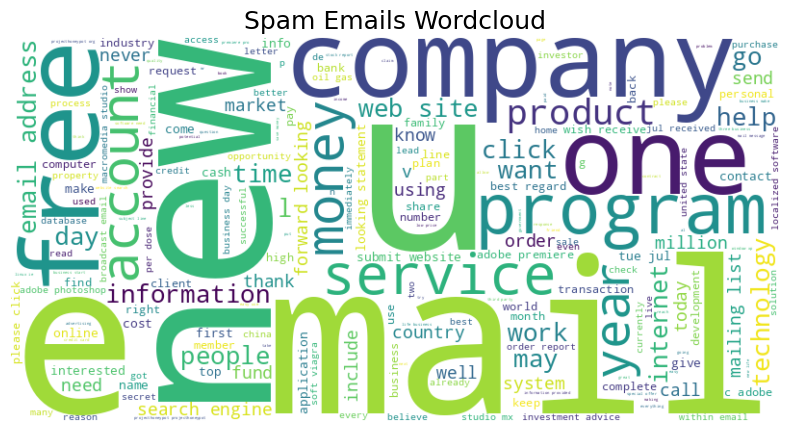

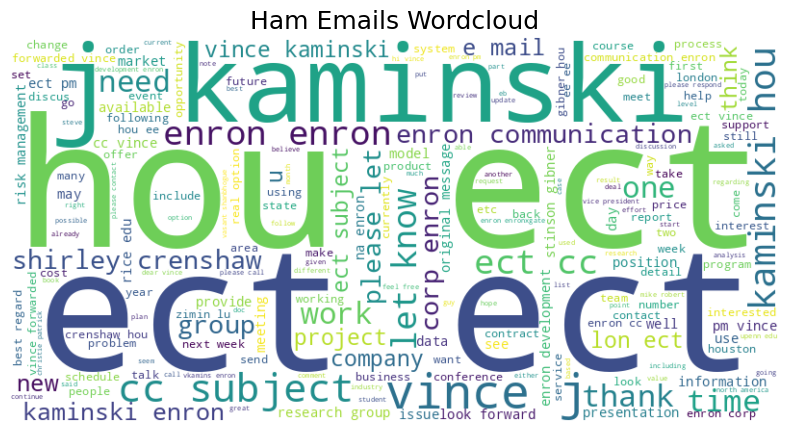

In [ ]:
# Split the dataset into spam and ham based on the 'spam' column
# Convert the 'spam' column to numeric, handling errors by coercing to NaN
df4['spam'] = pd.to_numeric(df4['spam'], errors='coerce')

# Filter for spam (spam is represented by 1) and ham (ham is represented by 0)
# Use .fillna(0) to replace any potential NaN values in the 'spam' column with 0.
# This ensures that the NaN values are treated as ham for the filtering.
spam_words = ' '.join(df4[df4['spam'].fillna(0) == 1]['cleaned_text'])
ham_words = ' '.join(df4[df4['spam'].fillna(0) == 0]['cleaned_text'])

# Generate wordclouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

generate_wordcloud(spam_words, "Spam Emails Wordcloud")
generate_wordcloud(ham_words, "Ham Emails Wordcloud")

#4. Feature Extraction - Extracting the Feature for Model use (Train-Test Split)

In [ ]:
df4['cleaned_text'].head()

,cleaned_text
0,naturally irresistible corporate identity lt r...
1,stock trading gunslinger fanny merrill muzo co...
2,unbelievable new home made easy im wanting sho...
3,color printing special request additional info...
4,money get software cd software compatibility g...


In [ ]:
stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_text(text):

    text_lower=text.lower()
    text_nonum = re.sub(r'\d+','', text_lower)
    text_nopunct = re.sub(r"[^\w\s]", '', text_nonum)
    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    text_lem = [lemmatizer.lemmatize(w, pos='v') for w in text_nopunct.split( )]

    # remove stopwords
    text_nostop = [w for w in text_lem if not w in stops]
    # Join words
    return( ' '.join(text_nostop))

In [ ]:
# Import the tqdm module from the tqdm library.
from tqdm import tqdm
# Call the tqdm.pandas() function to enable tqdm progress bars with Pandas operations.
tqdm.pandas()

df4['processed_text']=df4['text'].progress_apply(process_text)

100%|██████████| 5726/5726 [00:06<00:00, 928.28it/s]


In [ ]:
df4.head()

,text,spam,label,cleaned_text,processed_text
0,naturally irresistible your corporate identit...,1,spam,naturally irresistible corporate identity lt r...,naturally irresistible corporate identity lt r...
1,the stock trading gunslinger fanny is merril...,1,spam,stock trading gunslinger fanny merrill muzo co...,stock trade gunslinger fanny merrill muzo colz...
2,unbelievable new homes made easy im wanting ...,1,spam,unbelievable new home made easy im wanting sho...,unbelievable new home make easy im want show h...
3,4 color printing special request additional ...,1,spam,color printing special request additional info...,color print special request additional informa...
4,"do not have money , get software cds from her...",1,spam,money get software cd software compatibility g...,money get software cds software compatibility ...


# Text Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [ ]:
# Creates Count vectorizer and transforms the corpus
vectorizer = CountVectorizer()
text_corpus = vectorizer.fit_transform(df4['processed_text'])
text_corpus.shape

(5726, 29605)

In [ ]:
# Convert Vectorized data into a DataFrame
df = pd.DataFrame(text_corpus.toarray(),columns=vectorizer.get_feature_names_out())
df.head()

,aa,aaa,aaaenerfax,aadedeji,aagrawal,aal,aaldous,aaliyah,aall,aanalysis,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#matrix
text_corpus.toarray()[0:20]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#see feature names
feature_names = vectorizer.get_feature_names_out()
print(feature_names[500:650])

['afforable' 'afford' 'affordability' 'affordable' 'affordabowl' 'afft'
 'afire' 'afoot' 'aford' 'afore' 'aforementioned' 'afpe' 'afraid' 'afree'
 'africa' 'african' 'africans' 'aft' 'afteading' 'aftermath' 'afternoon'
 'afternoondc' 'afternoons' 'afterthought' 'afterward' 'afterwards' 'ag'
 'aga' 'againstyear' 'agarwal' 'agarwalla' 'agarwallah' 'agato' 'agc'
 'agdesteen' 'age' 'agencies' 'agency' 'agenda' 'agendal' 'agendas'
 'agent' 'agents' 'agentur' 'agerhardt' 'agg' 'aggrandisement' 'aggregate'
 'aggregation' 'aggregator' 'aggressive' 'aggressively' 'aggressor' 'aghh'
 'agileconcepts' 'agility' 'agin' 'agitate' 'aglife' 'agnes' 'agnihotri'
 'agnomen' 'ago' 'agowe' 'agradecer' 'agrawal' 'agree' 'agreeable'
 'agreelment' 'agreemeent' 'agreement' 'agreements' 'agressively'
 'agresti' 'agri' 'agricaltural' 'agricultural' 'agriculture'
 'agriculturists' 'agrocom' 'aguardando' 'aguardo' 'aguilar' 'agus' 'ah'
 'ahad' 'ahamer' 'ahc' 'ahead' 'aherns' 'ahi' 'ahmad' 'ahmedabad' 'ahn'
 'ahora

In [ ]:
#dependent feature
category = df4['label']
print(category.shape)
category.head()

(5726,)


,label
0,spam
1,spam
2,spam
3,spam
4,spam


#5. Training a Classification Model

In [ ]:
#split the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(text_corpus,category,test_size=0.20,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (4580, 29605) (4580,)
Test data shape  (1146, 29605) (1146,)


In [ ]:
#Apply Naive Bayes model
#fit the model and predicct the output
from sklearn.metrics import classification_report, confusion_matrix

clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the category for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test)) #print confusion matrix
print(classification_report(Y_test, pred))

Accuracy: 0.9895287958115183
Confusion Matrix
[[848   4]
 [  8 286]]
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       856
        spam       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.9912739965095986
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       856
        spam       0.99      0.98      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

Confusion Matrix:
 [[852   4]
 [  6 284]]


In [ ]:
# Creating an instance of LinearSVC
svm_model = LinearSVC()

# Fitting the model on the training data
svm_model.fit(X_train, Y_train)

# Predicting the labels for the test data
y_pred = svm_model.predict(X_test)
# Evaluating the accuracy
accuracy = svm_model.score(X_test, Y_test)
print("Accuracy: %s" % str(accuracy))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(pred, Y_test))
print(classification_report(Y_test, pred))

Accuracy: 0.9851657940663177
Confusion Matrix:
[[848   4]
 [  8 286]]
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       856
        spam       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
def predict_text_type(input_text):
    # Preprocess the input sample
    preprocessed_sample = process_text(input_text)

    # Vectorize the preprocessed sample using the same vectorizer used for training
    sample_vectorized = vectorizer.transform([preprocessed_sample])

    # Predict the article type using the trained model
    prediction = clf.predict(sample_vectorized)
    return prediction

In [ ]:
# Example usage:
input_text="congratulations you won a jackpot"
predicted_category = predict_text_type(input_text)
print("Predicted article Type:", predicted_category)

Predicted article Type: ['ham']


Using Bag of Words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df4['cleaned_text'])
print(bow_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Bag of Words Matrix:\n", bow_matrix.toarray())

Vocabulary: ['aa' 'aaa' 'aaaenerfax' ... 'zzn' 'zzncacst' 'zzzz']
Bag of Words Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Creating Bag of Words representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df4['cleaned_text'])

# Step 3: Get feature names (words) and their frequencies
feature_names = vectorizer.get_feature_names_out()
word_frequencies = bow_matrix.toarray().sum(axis=0)

# Create a DataFrame to display frequencies
frequency_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})

# Sort by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 most frequent words
print("Top 10 Most Frequent Words:")
print(frequency_df.head(10))

Top 10 Most Frequent Words:
       Word  Frequency
0     enron      13214
1       ect      11427
2     vince       8532
3       hou       5577
4       com       5420
5    please       4967
6  kaminski       4770
7   subject       4463
8     would       4356
9        cc       3894


In [ ]:
#Create Bag of Words representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df4['cleaned_text'])

# Step 3: Convert to a DataFrame for better tabular representation
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 4: Calculate word frequencies across all rows (documents)
word_frequencies = bow_df.sum(axis=0).reset_index()

# Rename columns for better clarity
word_frequencies.columns = ['Word', 'Frequency']

# Sort the frequencies in descending order
word_frequencies = word_frequencies.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the tabular data
print(word_frequencies)

             Word  Frequency
0           enron      13214
1             ect      11427
2           vince       8532
3             hou       5577
4             com       5420
...           ...        ...
30878    openning          1
30879     openwin          1
30880       opera          1
30881  operacloak          1
30882      madhur          1

[30883 rows x 2 columns]


#6. Identify Key Words for Spam and Ham

In [ ]:
# Ensuring 'spam' column is numeric and handle missing values before splitting
df4['spam'] = pd.to_numeric(df4['spam'], errors='coerce').fillna(0)  # Replace NaN with 0

# Extract features using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df4['cleaned_text'])
y = df4['spam']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Feature extraction complete. Shape of X_train:", X_train.shape)

Feature extraction complete. Shape of X_train: (4580, 3000)


In [ ]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9825479930191972
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       0.99      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.99      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[854   2]
 [ 18 272]]


In [ ]:
# Extract feature importance using Logistic Regression coefficients
spam_terms = []
ham_terms = []

if hasattr(model, 'coef_'):
    feature_names = tfidf.get_feature_names_out()
    coefficients = model.coef_[0]

    # Sort terms by importance
    sorted_indices = np.argsort(coefficients)
    spam_terms = [(feature_names[i], coefficients[i]) for i in sorted_indices[-10:]]
    ham_terms = [(feature_names[i], coefficients[i]) for i in sorted_indices[:10]]

print("Top Spam Trigger Words:", spam_terms)
print("Top Ham Words:", ham_terms)

Top Spam Trigger Words: [('adobe', 2.1347845869495607), ('viagra', 2.1535505420979137), ('free', 2.2237200755735986), ('http', 2.2637420099503345), ('online', 2.3623350772233054), ('save', 2.388696253968567), ('life', 2.6939796091248542), ('money', 2.8153138179563424), ('software', 2.8291615759984503), ('click', 3.1950701068013507)]
Top Ham Words: [('enron', -5.564936902810169), ('vince', -5.134547881358128), ('ect', -2.831595269306713), ('thanks', -2.6312499738035755), ('research', -2.617344763499155), ('would', -2.4363328693226944), ('kaminski', -2.3686386286435996), ('energy', -2.228387109448536), ('model', -2.2027684105257492), ('please', -1.937568269573111)]


# 7. Building an Inference Function

In [ ]:
# Function to classify a new email
def classify_email(email_content, model, vectorizer):
    processed_email = preprocess_text(email_content)
    email_vector = vectorizer.transform([processed_email])
    prediction = model.predict(email_vector)[0]
    return "Spam" if prediction == 'spam' else "Ham"

# Example usage
new_email = "Congratulations! You have won a free iPhone. Click here to claim your prize."
print("Prediction:", classify_email(new_email, model, tfidf))

Prediction: Ham


#Recommendations

1. Use the top spam-triggering words (spam_terms) and ham-related words (ham_terms) to prepare a list of terms that users should note.
2. Avoid overusing spammy terms (e.g., "free", "win", "congratulations").
3. Use safe/ham words in marketing emails to minimize spam risks.